# Roadmap

1. Get data
2. Create train-test split
3. Clean training set (write functions): missing values, text, categorical attributes, scaling
4. Select models and scoring metrics, then train
5. Compare them: clean test set, make predictions, score
6. Fine-tune models

In [1]:
%load_ext autoreload
%autoreload 2
import autoreload

## 1. Load data

In [34]:
from functions import load_data
data_df = load_data('data/time_series.xlsx')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2012-04-08 to 2017-11-05
Columns: 1833 entries, 012 to TRUHONE
dtypes: int64(1833)
memory usage: 4.1 MB


## 2. Train-Test Split

In [35]:
# splitting into training and testing sets setting aside last year for testing
from functions import ts_train_test_split

train_df, test_df = ts_train_test_split(data_df, 52)
train_df.head()

Observations: 292
Training Observations: 240
Testing Observations: 52


,012,017,03008944ST-1,03008944ST-3,0300ST1550-1,0300ST15X9-1,0300ST15X9-2,0300ST15X9-3,0300ST1605-1,0300ST1605-2,...,9920-2,9920-3,9920-4,9920-5,9920-6,9920-7,9997-25,HW220D15,HW240DIA,TRUHONE
EntDate,,,,,,,,,,,,,,,,,,,,,
2012-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-04-15,0,0,0,0,0,0,0,0,0,0,...,20,19,7,166,98,0,0,0,0,0
2012-04-22,0,0,0,0,0,0,0,0,0,0,...,41,15,10,207,87,0,0,0,0,0
2012-04-29,0,0,0,0,0,0,0,0,0,0,...,38,44,13,101,21,10,0,0,0,0
2012-05-06,0,0,0,0,0,0,0,0,0,0,...,29,47,21,75,43,0,0,0,0,0


## Train-Test Split -- alternative

In [ ]:
# now we will make three datasets using 33-33-34
X = data_df.values
train_size1 = int(len(X) * 0.33)
train_size2 = int(len(X) * 0.66)
pretrain, train, test = X[0:train_size1], X[train_size1:train_size2], X[train_size2:len(X)]
print('Observations: %d' % (len(X)))
print('Initializing Observations: %d' % (len(pretrain)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
# made train_df and test_df (the latter to be used later)
pretrain_df = data_df[0:train_size1]
train_df = data_df[train_size1:train_size2]
test_df = data_df[train_size2:292]
train_df.head()

## Select single item for forecasting

In [ ]:
# pick one item
test = train_df['9920-2']
test.head()

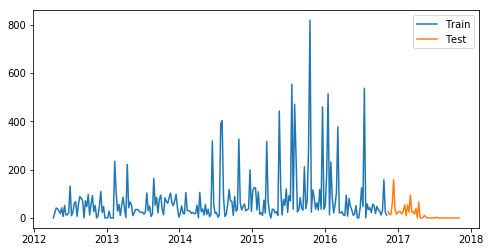

In [36]:
# plot one item
from functions import plot_train_test
plot_train_test(train_df, test_df, '9920-2')

## 3. Clean Training Set

In [ ]:
# make a copy first

In [ ]:
# make transformations pipeline (first applied to train, then apply to test)
# luckily, our data has no null values, no categorical/text values
# however, to get the initial messy excel sheet into timeseries format was not easy
# describe

## 4. Select Models and Scoring Metrics

We are comparing different forecasting models on the same data, so we can use scale-dependent errors because our single dataset only has one scale. We will use two metrics: <br>
* MAD (also called MAE): $\frac{|A_t-F_t|}{n}$ <br>
* RMSE (root mean squared error): $\sqrt{\frac{(A_t-F_t)^2}{n}}$ <br>

For baseline, we will use:
* naive forecast ("only yesterday matters")

Then we will try two simple forecasts:
* cumulative ("history matters")
* moving average ("I select how much matters")

We will also try:
* ARIMA
* exponential smoothing

### Make Forecasts

In [37]:
# make a df to store all our predictions
from functions import make_copy_df
y_hat = make_copy_df(test_df, '9920-2')

### Naive Forecast (Baseline)

In [38]:
# FIX LATER
import numpy as np

dd= np.asarray(train_df['9920-2'])
y_hat['naive'] = dd[len(dd)-1] # this line of code is for one-time forecast

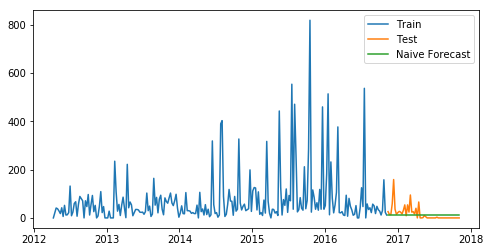

In [39]:
# plot
from functions import plot_time_series
plot_time_series(train_df, test_df, '9920-2', y_hat, 'naive', 'Naive Forecast')

In [40]:
# calculate RMSE
from functions import RMSE

RMSE(test_df, '9920-2', y_hat, 'naive')

29.12737279868966

In [ ]:
# calculate MAE
from functions import MAE

MAE(test_df, '9920-2', y_hat, 'naive')

### Cumulative

In [ ]:
from functions import cumulative
y_hat['cumulative'] = cumulative(train_df['9920-2'])
plot_time_series(train_df, test_df, '9920-2', y_hat, 'cumulative', 'Cumulative Forecast')

In [ ]:
# calculate RMSE
from functions import RMSE

RMSE(test_df,'9920-2', y_hat, 'cumulative')

In [ ]:
# calculate MAE
from functions import MAE

MAE(test_df,'9920-2', y_hat, 'cumulative')

### Moving Average

In [ ]:
# forecasts for a quarter year do better than half year or full year
from functions import moving_average
y_hat['moving_avg'] = moving_average(train_df['9920-2'], m=13)

plot_time_series(train_df, test_df, '9920-2', y_hat, 'moving_avg', 'Moving Average Forecast')

In [ ]:
# calculate RMSE
from functions import RMSE

RMSE(test_df,'9920-2', y_hat, 'moving_avg')

In [ ]:
# calculate MAE
from functions import MAE

MAE(test_df,'9920-2', y_hat, 'moving_avg')

### S/ARIMA

In [ ]:
# gridsearch with pyramid
from pyramid.arima import ARIMA

fit = ARIMA(order=(1, 1, 0), seasonal_order=(1, 0, 0, 12)).fit(y=train_df['9920-2'])

from pyramid.arima import auto_arima

stepwise_fit = auto_arima(train_df['9920-2'], start_p=0, start_q=0, max_p=6, max_q=6, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

/Users/andreafabry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/andreafabry/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1051: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.state_error and params_variance == []:


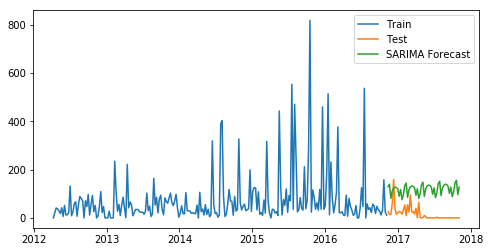

In [41]:
# fit with SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

fit1 = SARIMAX(train_df['9920-2'], order=(0, 1, 1), seasonal_order=(0,1,2,12), freq='W').fit()
y_hat['SARIMA'] = fit1.predict(start="2016-11-06", end="2017-11-05", dynamic=True, typ='levels')

# plot
plot_time_series(train_df, test_df, '9920-2', y_hat, 'SARIMA', 'SARIMA Forecast')

In [42]:
# calculate RMSE
from functions import RMSE

RMSE(test_df,'9920-2', y_hat, 'SARIMA')

108.7021696793306

### Exponential Smoothing

In [ ]:
# let's decompose it first to see trend, seasonality
from functions import decompose_timeseries

decompose_timeseries(train_df['9920-2'], 'additive')

In [ ]:
# Double Exponential Smoothing with Statsmodels
# no trend, just seasonality (multiplicative), no damping
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend=None, seasonal='additive').fit(smoothing_level=0.51, smoothing_seasonal=0.1)
y_hat['DES'] = fit1.forecast(len(test_df))

# plot
plot_time_series(train_df, test_df, '9920-2', y_hat, 'DES', 'Double ES Forecast')

In [ ]:
# calculate RMSE
from functions import RMSE

RMSE(test_df,'9920-2', y_hat, 'DES')

/Users/andreafabry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


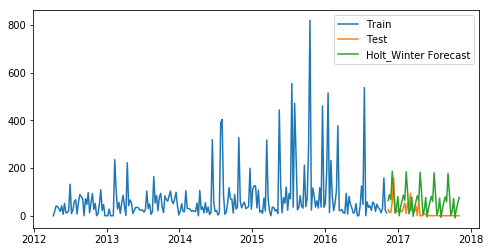

In [43]:
# here we have trend and seasonality, so we will use Holt-Winters with Statsmodels
# additive trend and seasonality, no trend damping, seasonal periods=10
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=10, trend='add', seasonal='add').fit(smoothing_level=0.51, smoothing_slope=0.015,smoothing_seasonal=0.1)
y_hat['Holt_Winter'] = fit1.forecast(len(test_df))

plot_time_series(train_df, test_df, '9920-2', y_hat, 'Holt_Winter', 'Holt_Winter Forecast')

In [44]:
# calculate RMSE
from functions import RMSE

RMSE(test_df,'9920-2', y_hat, 'Holt_Winter')

71.76790072328036

In [ ]:
# calculate MAE
from functions import MAE

MAE(test_df,'9920-2', y_hat, 'Holt_Winter')

### Exponential Smoothing with Homebrewed Functions

In [45]:
from exponential_smoothing import initial_trend, initial_seasonal_components, triple_exponential_smoothing

In [46]:
predictions = triple_exponential_smoothing(train_df['9920-2'], slen=10, alpha=0.51, beta=0.015, gamma=0.1, n_preds=52)
y_hat['HW_new'] = predictions[-52:]

In [47]:
# calculate RMSE
from functions import RMSE

RMSE(test_df, '9920-2', y_hat, 'HW_new')

58.002985013121666

### Exponential Smoothing with Homebrewed Class

In [48]:
# additive trend and seasonality, no trend damping, seasonal periods=10
from HoltWinters_class2 import HoltWinters

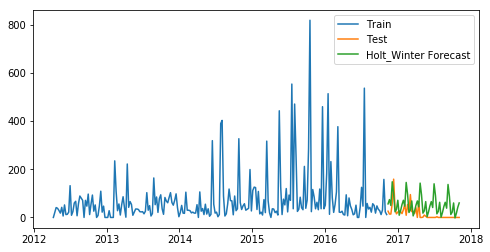

In [49]:
model = HoltWinters(alpha=0.51, beta=0.015, gamma=0.1, n_preds=52)
model.fit(train_df['9920-2'])

preds = model.predict(train_df['9920-2'])
y_hat['Holt_Winter'] = preds[-52:]

from functions import plot_time_series
plot_time_series(train_df, test_df, '9920-2', y_hat, 'Holt_Winter', 'Holt_Winter Forecast')

In [50]:
# calculate RMSE
model.score(train_df['9920-2'], test_df['9920-2'])

ValueError: Found input variables with inconsistent numbers of samples: [52, 292]

In [ ]:
# tried running checkestimator -- failed
from sklearn.utils.estimator_checks import check_estimator
from HoltWinters_class3 import HoltWinters
check_estimator(HoltWinters)  # passes

In [ ]:
# tried gridsearch without score() method inside class -- failed
from sklearn.model_selection import GridSearchCV
from HoltWinters_class3 import HoltWinters


# create a parameter grid: map the parameter names to the values
param_grid = {'alpha': [0.02, 0.1, 0.19, 0.35, 0.51],                   
                'beta': [0.005, 0.029, 0.053, 0.094, 0.135, 0.176],
                'gamma': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}
# instantiate the grid
grid_search = GridSearchCV(HoltWinters(), param_grid)
# fit the grid with data
grid_search.fit(train_df['9920-2'])
# print best results
grid_search.best_params_ 

In [ ]:
# tried gridsearch with customer scoring function -- failed
from sklearn.model_selection import GridSearchCV
from HoltWinters_class3 import HoltWinters

from sklearn.metrics import mean_squared_error, make_scorer

def my_custom_loss_func(test, yhat):
    return sqrt(mean_squared_error(test, yhat))
my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

# create a parameter grid: map the parameter names to the values
param_grid = {'alpha': [0.02, 0.1, 0.19, 0.35, 0.51],                   
                'beta': [0.005, 0.029, 0.053, 0.094, 0.135, 0.176],
                'gamma': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}
# instantiate the grid
grid_search = GridSearchCV(HoltWinters(), param_grid, scoring=my_scorer(test=test_df['9920-2']))
# fit the grid with data
grid_search.fit(train_df['9920-2'])
# print best results
grid_search.best_params_ 

### Prophet

In [51]:
# imports 
from fbprophet import Prophet

/Users/andreafabry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [52]:
# make a copy of the dataframe for Prophet transformations
from functions import make_copy_df
prophet_df = make_copy_df(train_df, '9920-2')

In [53]:
# rename variables (prophet requires the variable names in the time series to be
# y for target and ds for Datetime)
from functions import rename_columns
rename_columns(prophet_df, '9920-2')
prophet_df.head()

,ds,y
EntDate,,
2012-04-08,2012-04-08,0
2012-04-15,2012-04-15,20
2012-04-22,2012-04-22,41
2012-04-29,2012-04-29,38
2012-05-06,2012-05-06,29


In [54]:
# FIX LATER
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(growth='linear', interval_width=0.95, weekly_seasonality=True)
my_model.fit(prophet_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/andreafabry/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [55]:
# FIX LATER
future_dates = my_model.make_future_dataframe(periods=52, freq='W')
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
287,2017-10-08,144.360678,-45.113021,339.074056
288,2017-10-15,180.809195,-5.784743,360.369468
289,2017-10-22,179.667831,-13.895023,365.308590
290,2017-10-29,144.536513,-49.192499,343.681795
291,2017-11-05,103.419900,-86.580458,293.342183


In [56]:
# FIX LATER
forecast.head()
forecast = forecast.set_index('ds')
forecast_slice=forecast[240:292]
forecast_df = forecast_slice["yhat"]
forecast_df.head()

ds
2016-11-13     66.955016
2016-11-20     72.518387
2016-11-27     90.354918
2016-12-04    109.179976
2016-12-11    121.318523
Name: yhat, dtype: float64

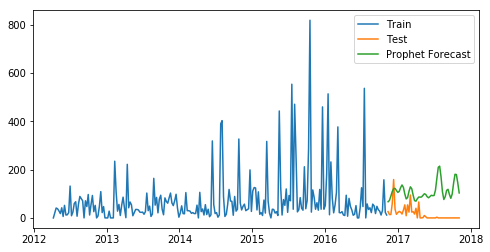

In [57]:
# plot
plot_time_series(train_df, test_df, '9920-2', forecast_slice, 'yhat', 'Prophet Forecast')

In [58]:
# calculate RMSE
from functions import RMSE

RMSE(test_df, '9920-2', forecast_slice, 'yhat')

104.04466571337738

## Resources

Great basic blogs on time series and forecasting methods: https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

On Prophet:
https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/
https://research.fb.com/prophet-forecasting-at-scale/
(Plus see 